<a href="https://colab.research.google.com/github/anacaballero/NLP/blob/master/word_cloud_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Cloud Generator for Spanish Text

## Introduction

This code allows you to generate a word cloud from Spanish text. It uses the `wordcloud` and `nltk` libraries for word cloud creation and text preprocessing, respectively. The code also includes robust font handling to ensure the Roboto font is available for a visually appealing word cloud.


## How it Works

1. **Installation:** Installs the necessary libraries (`nltk`, `wordcloud`, `ipywidgets`).
2. **Stopwords:** Downloads Spanish stopwords (common words to ignore) using `nltk`.
3. **Font:** Downloads and installs the Roboto font for a better visual style, handling potential download errors.
4. **Input:** Provides a text area where you can paste your Spanish text.
5. **Word Cloud Generation:** When you click "Generate Word Cloud," the code:
   - **Cleans the text:** Removes punctuation, converts to lowercase.

In [30]:
!pip install nltk -q
!pip install wordcloud -q
!pip install ipywidgets -q
!apt-get update -qq --fix-missing  # Added --fix-missing
!apt-get install -y -qq fonttools
import nltk
nltk.download('stopwords', quiet=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import ipywidgets as widgets
from IPython.display import display
import io
import requests
import os
import zipfile

# --- Font Download and Installation (Using a ZIP file) ---
# Updated URL to point to the Roboto ZIP file
font_url = "https://fonts.google.com/download?family=Roboto:300,300i,400,400i,500,500i,700,700i,900,900i&display=swap"
font_zip_path = "/tmp/Roboto.zip"
font_dir = "/usr/share/fonts/truetype/roboto"

if not os.path.exists(font_dir):
    try:
        response = requests.get(font_url, stream=True)
        response.raise_for_status()
        with open(font_zip_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)

        with zipfile.ZipFile(font_zip_path, 'r') as zip_ref:
            zip_ref.extractall(font_dir)

        !fc-cache -fv
        font_path = os.path.join(font_dir, "Roboto-Regular.ttf")
    except Exception as e:
        print(f"Error installing font: {e}")
        print("Falling back to default font.")
        font_path = None
else:
    font_path = os.path.join(font_dir, "Roboto-Regular.ttf")

# ... (rest of the code, including generate_wordcloud function, remains the same) ...
# Create a text area widget
text_area = widgets.Textarea(
    placeholder='Paste your text here',
    layout=widgets.Layout(width='80%', height='200px')
)
display(text_area)

# Function to generate and display the word cloud
def generate_wordcloud(text):
    df = pd.DataFrame([text], columns=['text'])

    def preprocess_text(text):
        text = text.lower()
        text = ''.join([char for char in text if char.isalpha() or char.isspace()])
        stop_words = set(stopwords.words('spanish'))
        words = text.split()
        filtered_words = [word for word in words if word not in stop_words]
        return ' '.join(filtered_words)

    preprocessed_text = preprocess_text(df['text'][0])

    wordcloud = WordCloud(background_color='white', font_path=font_path, max_words=100).generate(preprocessed_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Button to trigger word cloud generation
button = widgets.Button(description="Generate Word Cloud")
output = widgets.Output()

def on_button_clicked(b):
    with output:
        output.clear_output()
        text_data = text_area.value
        generate_wordcloud(text_data)

button.on_click(on_button_clicked)
display(button, output)

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Error installing font: File is not a zip file
Falling back to default font.


Textarea(value='', layout=Layout(height='200px', width='80%'), placeholder='Paste your text here')

Button(description='Generate Word Cloud', style=ButtonStyle())

Output()

In [4]:
text_data = [
    "The quick brown fox jumps over the lazy dog.",
    "Lorem ipsum dolor sit amet, consectetur adipiscing elit.",
    "I love creating fun and creative data transformation agents!",
    "Artificial intelligence is changing the world.",
    "Embrace the power of data and let your creativity shine!"
]

In [7]:
text_data="""En el corazón de Estocolmo, una ciudad encantadora, vivía una madre amorosa llamada Ana. Sus dos hijas, Olivia y Claudia, eran las luces de su vida. Sin embargo, un giro inesperado en su historia familiar las llevó a vivir una aventura mágica y divertida.

Un día, Ana recibió una carta misteriosa con un sello dorado que representaba un cisne. Intrigada, abrió el sobre y descubrió que sus hijas habían sido aceptadas en el Colegio Hogwarts de Magia y Hechicería, una escuela de magia ubicada en Salamanca, España, donde vivía su abuela.

Ana, emocionada por la oportunidad que se les presentaba a sus hijas, las acompañó a la estación de tren para despedirlas. Allí, un anciano con una túnica azul y un sombrero puntiagudo las esperaba. Era Don Alfonso, el director de la escuela.

El tren que las llevaría a Salamanca era diferente a cualquier otro. Los vagones eran de madera tallada y las ventanas tenían vitrales de colores. Al abordar, Olivia y Claudia se encontraron con un mundo nuevo y emocionante.

Durante el trayecto, las hermanas conocieron a otros estudiantes de Hogwarts, incluyendo a una pequeña bruja llamada Luna, que se convirtió en su amiga instantáneamente. Juntas, exploraron el tren y descubrieron un vagón que parecía una tienda de dulces voladora, llena de golosinas mágicas.

Al llegar a Salamanca, las chicas fueron recibidas por su abuela, una mujer sabia y cariñosa que también era una bruja retirada. Juntas, se dirigieron al castillo donde se encontraba la escuela, un lugar impresionante con torres altas y banderas al viento.

En Hogwarts, Olivia y Claudia se sumergieron en un mundo de magia y maravillas. Aprendieron a volar en escobas, a conjurar hechizos y a crear pociones. En sus ratos libres, exploraban los jardines del castillo y se encontraban con criaturas míticas como unicornios y dragones.

Ana, aunque extrañaba mucho a sus hijas, sabía que estaban viviendo una experiencia única e inolvidable. Mantenía correspondencia regular con ellas a través de lechuzas mensajeras, que llevaban cartas llenas de historias emocionantes y dibujos de sus aventuras.

En una de esas cartas, Olivia y Claudia le contaron a Ana sobre un torneo de habilidades mágicas que se llevaría a cabo en la escuela. Las hermanas habían formado un equipo con Luna y estaban decididas a ganar.

El día del torneo, Ana decidió hacer una sorpresa a sus hijas y viajó a Salamanca. Al llegar al castillo, se encontró con un espectáculo impresionante: estudiantes volando en escobas, lanzando hechizos y demostrando sus habilidades mágicas.

Ana observó con orgullo cómo Olivia y Claudia trabajaban juntas, utilizando la magia y la astucia para superar cada desafío. En el momento decisivo, las hermanas conjuraron un hechizo que les permitió ganar el torneo, para deleite de todos.

Después de la competencia, Ana abrazó a sus hijas con lágrimas de felicidad en los ojos. Estaba agradecida por la oportunidad que les había dado Hogwarts y por la forma en que habían crecido y se habían unido aún más durante su tiempo en Salamanca.

A partir de ese día, Ana visitaba regularmente a Olivia y Claudia en la escuela, compartiendo momentos mágicos y llenos de amor. Y aunque echaba de menos a sus hijas, sabía que estaban destinadas a grandes cosas en el mundo de la magia.

Así, la familia vivió muchas aventuras, riendo, amando y descubriendo el poder de la magia juntas, unidas por un vínculo que trascendía la distancia y que ni siquiera los hechizos más poderosos podían romper.

"""

In [9]:
# prompt: como leer el text_data ahora que no es una lista

text_data="""En el corazón de Estocolmo, una ciudad encantadora, vivía una madre amorosa llamada Ana. Sus dos hijas, Olivia y Claudia, eran las luces de su vida. Sin embargo, un giro inesperado en su historia familiar las llevó a vivir una aventura mágica y divertida.

Un día, Ana recibió una carta misteriosa con un sello dorado que representaba un cisne. Intrigada, abrió el sobre y descubrió que sus hijas habían sido aceptadas en el Colegio Hogwarts de Magia y Hechicería, una escuela de magia ubicada en Salamanca, España, donde vivía su abuela.

Ana, emocionada por la oportunidad que se les presentaba a sus hijas, las acompañó a la estación de tren para despedirlas. Allí, un anciano con una túnica azul y un sombrero puntiagudo las esperaba. Era Don Alfonso, el director de la escuela.

El tren que las llevaría a Salamanca era diferente a cualquier otro. Los vagones eran de madera tallada y las ventanas tenían vitrales de colores. Al abordar, Olivia y Claudia se encontraron con un mundo nuevo y emocionante.

Durante el trayecto, las hermanas conocieron a otros estudiantes de Hogwarts, incluyendo a una pequeña bruja llamada Luna, que se convirtió en su amiga instantáneamente. Juntas, exploraron el tren y descubrieron un vagón que parecía una tienda de dulces voladora, llena de golosinas mágicas.

Al llegar a Salamanca, las chicas fueron recibidas por su abuela, una mujer sabia y cariñosa que también era una bruja retirada. Juntas, se dirigieron al castillo donde se encontraba la escuela, un lugar impresionante con torres altas y banderas al viento.

En Hogwarts, Olivia y Claudia se sumergieron en un mundo de magia y maravillas. Aprendieron a volar en escobas, a conjurar hechizos y a crear pociones. En sus ratos libres, exploraban los jardines del castillo y se encontraban con criaturas míticas como unicornios y dragones.

Ana, aunque extrañaba mucho a sus hijas, sabía que estaban viviendo una experiencia única e inolvidable. Mantenía correspondencia regular con ellas a través de lechuzas mensajeras, que llevaban cartas llenas de historias emocionantes y dibujos de sus aventuras.

En una de esas cartas, Olivia y Claudia le contaron a Ana sobre un torneo de habilidades mágicas que se llevaría a cabo en la escuela. Las hermanas habían formado un equipo con Luna y estaban decididas a ganar.

El día del torneo, Ana decidió hacer una sorpresa a sus hijas y viajó a Salamanca. Al llegar al castillo, se encontró con un espectáculo impresionante: estudiantes volando en escobas, lanzando hechizos y demostrando sus habilidades mágicas.

Ana observó con orgullo cómo Olivia y Claudia trabajaban juntas, utilizando la magia y la astucia para superar cada desafío. En el momento decisivo, las hermanas conjuraron un hechizo que les permitió ganar el torneo, para deleite de todos.

Después de la competencia, Ana abrazó a sus hijas con lágrimas de felicidad en los ojos. Estaba agradecida por la oportunidad que les había dado Hogwarts y por la forma en que habían crecido y se habían unido aún más durante su tiempo en Salamanca.

A partir de ese día, Ana visitaba regularmente a Olivia y Claudia en la escuela, compartiendo momentos mágicos y llenos de amor. Y aunque echaba de menos a sus hijas, sabía que estaban destinadas a grandes cosas en el mundo de la magia.

Así, la familia vivió muchas aventuras, riendo, amando y descubriendo el poder de la magia juntas, unidas por un vínculo que trascendía la distancia y que ni siquiera los hechizos más poderosos podían romper.

"""

# Ahora text_data es un string, puedes acceder a su contenido directamente
print(text_data)

# Puedes también iterar sobre cada linea
for line in text_data.splitlines():
  line

En el corazón de Estocolmo, una ciudad encantadora, vivía una madre amorosa llamada Ana. Sus dos hijas, Olivia y Claudia, eran las luces de su vida. Sin embargo, un giro inesperado en su historia familiar las llevó a vivir una aventura mágica y divertida.

Un día, Ana recibió una carta misteriosa con un sello dorado que representaba un cisne. Intrigada, abrió el sobre y descubrió que sus hijas habían sido aceptadas en el Colegio Hogwarts de Magia y Hechicería, una escuela de magia ubicada en Salamanca, España, donde vivía su abuela.

Ana, emocionada por la oportunidad que se les presentaba a sus hijas, las acompañó a la estación de tren para despedirlas. Allí, un anciano con una túnica azul y un sombrero puntiagudo las esperaba. Era Don Alfonso, el director de la escuela.

El tren que las llevaría a Salamanca era diferente a cualquier otro. Los vagones eran de madera tallada y las ventanas tenían vitrales de colores. Al abordar, Olivia y Claudia se encontraron con un mundo nuevo y emoc

In [19]:
!apt-get update
!apt-get install -y fonts-dejavu

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,071 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
G

In [ ]:
!pip install nltk -q
!pip install wordcloud -q
!pip install ipywidgets -q
import nltk
nltk.download('stopwords', quiet=True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import ipywidgets as widgets
from IPython.display import display
import io
import requests
import os

# --- Font Download and Installation (More Robust) ---
font_url = "https://fonts.google.com/download?family=Roboto"
font_path = '/usr/share/fonts/truetype/Roboto.ttf'

# Download the font to a temporary location
response = requests.get(font_url, stream=True)
response.raise_for_status()
with open('/tmp/Roboto.ttf', 'wb') as f:  # Save to /tmp/
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

# Install the font using the "fonttools" library
!apt-get update -qq
!apt-get install -y -qq fonttools  # Install fonttools if not already installed
!fonttools ttLib.woff2 /tmp/Roboto.ttf /usr/share/fonts/truetype/Roboto.ttf  # Convert and install
!fc-cache -fv  # Update font cache

# ... (rest of the code, including generate_wordcloud function) ...

In [24]:
Error loading font: unknown file format
Falling back to default font.

SyntaxError: invalid syntax (<ipython-input-24-34cb9e306426>, line 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


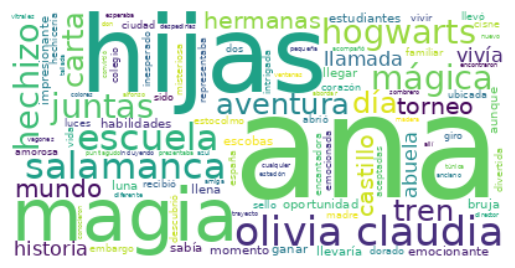

In [20]:
!pip install nltk
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Wrap your single string text_data into a list so it can be loaded into a DataFrame
df = pd.DataFrame([text_data], columns=['text'])

# Preprocess the text data
def preprocess_text(text):
    """Removes punctuation, converts to lowercase, and removes stop words."""
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # Keep only letters and spaces

    # Remove stop words
    stop_words = set(stopwords.words('spanish'))  # Use Spanish stop words
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]

    return ' '.join(filtered_words)  # Join filtered words back into a string

# Apply preprocessing and combine into a single string
preprocessed_text = preprocess_text(df['text'][0])


#preprocessed_text = ' '.join(df['text'].tolist())  # Add this line to assign preprocessed text

# Create a function to generate word clouds
def generate_wordcloud(text):
    # If DejaVuSans.ttf is not found, it will try to use arial.ttf
    # If neither is found, it will use the default font.
    try:
        # Try using DejaVuSans.ttf
        font_path = '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'
        wordcloud = WordCloud(background_color='white', font_path=font_path, max_words=100).generate(text)
    except OSError:
        try:
            # Try using arial.ttf (common system font)
            font_path = 'arial.ttf'
            wordcloud = WordCloud(background_color='white', font_path=font_path, max_words=100).generate(text)
        except OSError:
            # Use the default font (if available)
            print("Warning: Could not find specified or default fonts. Using default if available.")
            wordcloud = WordCloud(background_color='white', max_words=100).generate(text)

    return wordcloud

# Apply the word cloud function to your preprocessed text data
wordcloud = generate_wordcloud(preprocessed_text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Save the word cloud image
wordcloud.to_file('wordcloud.png')

In [18]:
!fc-list | grep "DejaVuSans"  # Check for DejaVu Sans font
